In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
import utilsPerf as uperf
import importlib
importlib.reload(uperf)

<module 'utilsPerf' from '/gpfs/slac/atlas/fs1/u/rafaeltl/L1BTagATLAS/training/rnnip/l1dips/notebooks/utilsPerf.py'>

In [3]:
def fourjeteff(eff):
    return 6.*(eff**2)*((1-eff)**2) + 4.*(eff**3)*(1-eff) + eff**4

In [4]:
ds_entries = ["pt", "eta","ip3d", "dips", "flav"]
d = {
    'nmou': {"file": "dss/ds_summary_r11004_RT_ConfigHTT_eff95flat_MoU2_sf2_pt4_v2.h5"},
    'fmou': {"file": "dss/ds_summary_r11002_MOU2in_L1TrkSimBasedWithOffPtDep_wFake.h5"},
    'nnpx': {"file": "dss/ds_summary_r11002_ConfigHTT_eff95flat_NoPix_In_sf2_pt4_v1.h5"},
    'fnpx': {"file": "dss/ds_summary_r11002NOPIX_L1TrkSimBasedWithOffPtDep_wFake.h5"},
    'mou': {"file": "dss/ds_summary_r11004_RT_ConfigHTT_eff95flat_MoU2_sf2_pt4.h5" },
#     'in':  {"file": "dss/ds_summary_r11004_RT_ConfigHTT_eff95flat_NewMoU_InIn_sf2_pt4.h5" },
#     'out': {"file": "dss/ds_summary_r11004_RT_ConfigHTT_eff95flat_NewMoU_OutOut_sf2_pt4.h5" },
    'tdr': {"file": "dss/ds_summary_r11002_RT_ConfigHTT_eff95flat_TDR2in_sf2_pt4.h5" },
    'npx': {"file": "dss/ds_summary_r11002_ConfigHTT_eff95flat_NoPix_In_sf2_pt4.h5" },
    'px4': {"file": "dss/ds_summary_r11002_eff95flat_PIX4L2_InIn_sf2_pt4.h5" },
#     'nom': {"file": "dss/ds_summary_r11004_RT_ConfigHTT_eff100flat_nominal.h5" }
}

for de in d:
    print(de)
    with h5py.File(d[de]["file"], "r") as tf:
        for dse in ds_entries:
            d[de][dse] = tf[dse][()]

nmou
fmou
nnpx
fnpx
mou
tdr
npx
px4


In [5]:
for de in d:
    ##roc inclusive
    pt_cut = d[de]['pt'] > 40000.
    eta_cut = np.abs(d[de]['eta']) < 2.5
    ind_cut = pt_cut & eta_cut
    
    flav_b = d[de]['flav'] == 5
    flav_l = d[de]['flav'] == 0
    
    dips_score_b = d[de]["dips"][ind_cut & flav_b]
    dips_score_l = d[de]["dips"][ind_cut & flav_l]
    ip3d_score_b = d[de]["ip3d"][ind_cut & flav_b]
    ip3d_score_l = d[de]["ip3d"][ind_cut & flav_l]
    
    d[de]["roc_incl_dips"] = uperf.make_roc_curve( dips_score_b, dips_score_l, 0,1 )
    d[de]["roc_incl_ip3d"] = uperf.make_roc_curve( ip3d_score_b, ip3d_score_l, -30,30 )
    
    ##roc between 40 and 60
    pt_cut = (d[de]['pt'] > 40000.) & (d[de]['pt'] < 60000.)
    eta_cut = np.abs(d[de]['eta']) < 4.0
    ind_cut = pt_cut & eta_cut
    
    dips_score_b = d[de]["dips"][ind_cut & flav_b]
    dips_score_l = d[de]["dips"][ind_cut & flav_l]
    ip3d_score_b = d[de]["ip3d"][ind_cut & flav_b]
    ip3d_score_l = d[de]["ip3d"][ind_cut & flav_l]
    
    d[de]["roc_4060_dips"] = uperf.make_roc_curve( dips_score_b, dips_score_l, 0,1 )
    d[de]["roc_4060_ip3d"] = uperf.make_roc_curve( ip3d_score_b, ip3d_score_l, -30,30 )

    ##roc between 0 and 2.6
    pt_cut = d[de]['pt'] > 20000.
    eta_cut = np.abs(d[de]['eta']) < 2.5
    ind_cut = pt_cut & eta_cut
    
    dips_score_b = d[de]["dips"][ind_cut & flav_b]
    dips_score_l = d[de]["dips"][ind_cut & flav_l]
    ip3d_score_b = d[de]["ip3d"][ind_cut & flav_b]
    ip3d_score_l = d[de]["ip3d"][ind_cut & flav_l]
    
    d[de]["roc_eta_dips"] = uperf.make_roc_curve( dips_score_b, dips_score_l, 0,1 )
    d[de]["roc_eta_ip3d"] = uperf.make_roc_curve( ip3d_score_b, ip3d_score_l, -30,30 )
    
    ##roc between 0 and 2.6 and pt between 40 and 60
    pt_cut = (d[de]['pt'] > 40000.) & (d[de]['pt'] < 60000.)
    eta_cut = np.abs(d[de]['eta']) < 2.5
    ind_cut = pt_cut & eta_cut
    
    dips_score_b = d[de]["dips"][ind_cut & flav_b]
    dips_score_l = d[de]["dips"][ind_cut & flav_l]
    ip3d_score_b = d[de]["ip3d"][ind_cut & flav_b]
    ip3d_score_l = d[de]["ip3d"][ind_cut & flav_l]
    
    d[de]["roc_eta4060_dips"] = uperf.make_roc_curve( dips_score_b, dips_score_l, 0,1 )
    d[de]["roc_eta4060_ip3d"] = uperf.make_roc_curve( ip3d_score_b, ip3d_score_l, -30,30 )



In [6]:
print(d.keys())

dict_keys(['nmou', 'fmou', 'nnpx', 'fnpx', 'mou', 'tdr', 'npx', 'px4'])


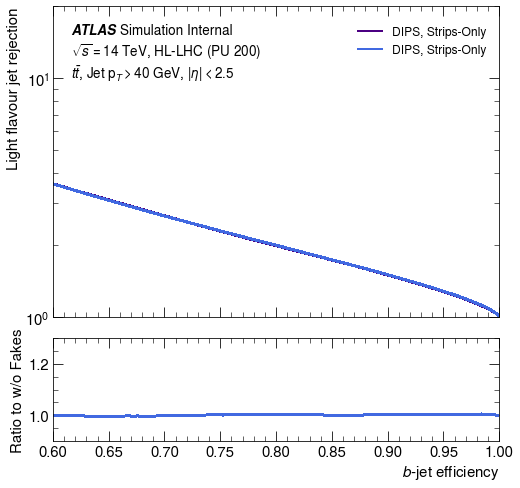

In [10]:
atlas_label = r"$\sqrt{s} = 14$ TeV, HL-LHC (PU 200)"
atlas_label += '\n' + r"$t\bar{t}$, Jet p$_T > 40$ GeV, $|\eta| < 2.5$"

uperf.make_roc_comparison("plots/roc_fakes_comparison.pdf", 
                          [
                              [d["nnpx"]["roc_incl_dips"][0], d["nnpx"]["roc_incl_dips"][1], "DIPS, Strips-Only", -1, 'royalblue'],
                              [d["nnpx"]["roc_incl_dips"][0], d["nnpx"]["roc_incl_dips"][1], "DIPS, Strips-Only", -1, 'royalblue'],
                              [d["fnpx"]["roc_incl_dips"][0], d["fnpx"]["roc_incl_dips"][1], "DIPS, Strips-Only w/Fakes", 0, 'cyan'],
                              [d["nmou"]["roc_incl_dips"][0], d["nmou"]["roc_incl_dips"][1], "DIPS, MoU", -1, 'maroon'],
                              [d["fmou"]["roc_incl_dips"][0], d["fmou"]["roc_incl_dips"][1], "DIPS, MoU w/Fales", 2, 'red']

#                               [claire_x, claire_y, "IP3D, Offline (Claire)", -1, 'green'],

                          ], atlas_label, r"$b$-jet efficiency", "Light flavour jet rejection", "Ratio to w/o Fakes",
                          0.6, 1.0, 
                          1, 20, 
                          0.9, 1.3, doylog=False, is_prem=False, lfsize=12)

In [24]:
import uproot

In [25]:
f = uproot.open("roc_curves_fineeatbins_AK4EM_IP3D_jet_ipxd_llr_jpt40_ConfigHTT_eff100flat.root")
claire_x = f['roc_curve_central_eta']._fX[2:][::-1]
claire_y = f['roc_curve_central_eta']._fY[2:][::-1]

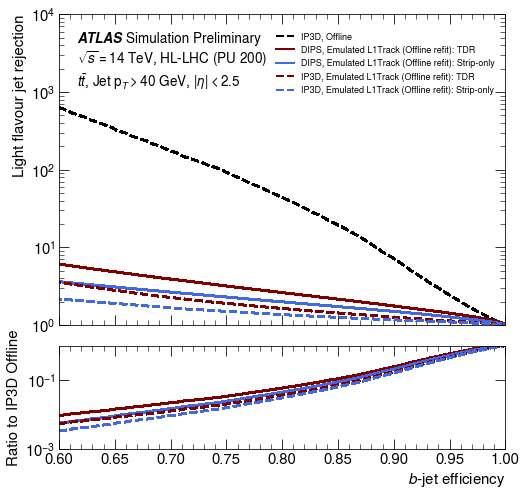

In [26]:
atlas_label = r"$\sqrt{s} = 14$ TeV, HL-LHC (PU 200)"
atlas_label += '\n' + r"$t\bar{t}$, Jet p$_T > 40$ GeV, $|\eta| < 2.5$"

uperf.make_roc_comparison("plots/roc_IP3D_DIPS_approval.pdf", 
                          [
                              [claire_x, claire_y, "IP3D, Offline", -1, 'black'],
                              [d["tdr"]["roc_incl_dips"][0], d["tdr"]["roc_incl_dips"][1], "DIPS, Emulated L1Track (Offline refit): TDR", 0, 'maroon'],
                              [d["npx"]["roc_incl_dips"][0], d["npx"]["roc_incl_dips"][1], "DIPS, Emulated L1Track (Offline refit): Strip-only", 0, 'royalblue'],
                              [d["tdr"]["roc_incl_ip3d"][0], d["tdr"]["roc_incl_ip3d"][1], "IP3D, Emulated L1Track (Offline refit): TDR", 0, 'maroon'],
                              [d["npx"]["roc_incl_ip3d"][0], d["npx"]["roc_incl_ip3d"][1], "IP3D, Emulated L1Track (Offline refit): Strip-only", 0, 'royalblue']

#                               [claire_x, claire_y, "IP3D, Offline (Claire)", -1, 'green'],

                          ], atlas_label, r"$b$-jet efficiency", "Light flavour jet rejection", "Ratio to IP3D Offline",
                          0.6, 1.0, 
                          1, 10000, 
                          0.001, 1, doylog=True, is_prem=True, lfsize=9)

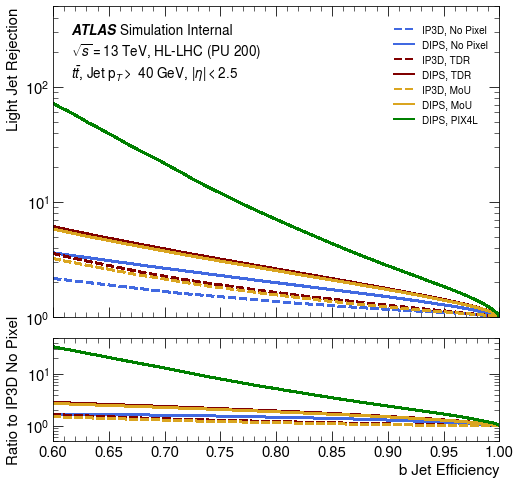

In [27]:
atlas_label = r"$\sqrt{s} = 13$ TeV, HL-LHC (PU 200)"
atlas_label += '\n' + r"$t\bar{t}$, Jet p$_T > $ 40 GeV, $|\eta| < 2.5$"

uperf.make_roc_comparison("plots/roc_inclusive.pdf", 
                          [
                              [d["npx"]["roc_incl_ip3d"][0], d["npx"]["roc_incl_ip3d"][1], "IP3D, No Pixel", -1, 'royalblue'],
                              [d["npx"]["roc_incl_dips"][0], d["npx"]["roc_incl_dips"][1], "DIPS, No Pixel", 0, 'royalblue'],
                              [d["tdr"]["roc_incl_ip3d"][0], d["tdr"]["roc_incl_ip3d"][1], "IP3D, TDR", 0, 'maroon'],
                              [d["tdr"]["roc_incl_dips"][0], d["tdr"]["roc_incl_dips"][1], "DIPS, TDR", 0, 'maroon'],
                              [d["mou"]["roc_incl_ip3d"][0], d["mou"]["roc_incl_ip3d"][1], "IP3D, MoU", 0, 'goldenrod'],
                              [d["mou"]["roc_incl_dips"][0], d["mou"]["roc_incl_dips"][1], "DIPS, MoU", 0, 'goldenrod'],
                              [d["px4"]["roc_incl_dips"][0], d["px4"]["roc_incl_dips"][1], "DIPS, PIX4L", 0, 'green'],

                          ], atlas_label, "b Jet Efficiency", "Light Jet Rejection", "Ratio to IP3D No Pixel",
                          0.6, 1.0, 
                          1, 500, 
                          0.5,50, doylog=True)

In [ ]:
atlas_label = r"$\sqrt{s} = 13$ TeV, HL-LHC"
atlas_label += '\n' + r"Jet p$_T > $ 40 GeV, Jet $|\eta| < 2.5$"
atlas_label += '\n' + "Four jets with two tags requirement"

uperf.make_roc_comparison("plots/four_jet_trigger.pdf", 
                          [
                              [fourjeteff(d["npx"]["roc_incl_ip3d"][0]), 1./fourjeteff(1./d["npx"]["roc_incl_ip3d"][1]), "IP3D, No Pixel", -1, 'royalblue'],
                              [fourjeteff(d["npx"]["roc_incl_dips"][0]), 1./fourjeteff(1./d["npx"]["roc_incl_dips"][1]), "DIPS, No Pixel", 0, 'royalblue'],
                              [fourjeteff(d["tdr"]["roc_incl_ip3d"][0]), 1./fourjeteff(1./d["tdr"]["roc_incl_ip3d"][1]), "IP3D, TDR", -1, 'maroon'],
                              [fourjeteff(d["tdr"]["roc_incl_dips"][0]), 1./fourjeteff(1./d["tdr"]["roc_incl_dips"][1]), "DIPS, TDR", 2, 'maroon'],
                              [fourjeteff(d["mou"]["roc_incl_ip3d"][0]), 1./fourjeteff(1./d["mou"]["roc_incl_ip3d"][1]), "IP3D, MoU", -1, 'goldenrod'],
                              [fourjeteff(d["mou"]["roc_incl_dips"][0]), 1./fourjeteff(1./d["mou"]["roc_incl_dips"][1]), "DIPS, MoU", 4, 'goldenrod'],
                              [fourjeteff(d["px4"]["roc_incl_dips"][0]), 1./fourjeteff(1./d["px4"]["roc_incl_dips"][1]), "DIPS, PIX4L", -1, 'green'],

                          ], atlas_label, "Four b Jets Efficiency", "Four Light Jets Rejection", "DIPS/IP3D",
                          0.6, 1, 
                          1, 5000000, 
                          1, 5)

In [ ]:
atlas_label = r"$\sqrt{s} = 13$ TeV, HL-LHC"
atlas_label += '\n' + r"Jet p$_T > $ 40 GeV" + '\n' + r"Jet $|\eta| < 2.5$"

uperf.make_roc_comparison("plots/roc_inclusive_mou.pdf", 
                          [
                              [d["mou"]["roc_incl_ip3d"][0], d["mou"]["roc_incl_ip3d"][1], "IP3D, MoU", -1, 'goldenrod'],
                              [d["mou"]["roc_incl_dips"][0], d["mou"]["roc_incl_dips"][1], "DIPS, MoU", -1, 'goldenrod'],
                              [d["npx"]["roc_incl_ip3d"][0], d["npx"]["roc_incl_ip3d"][1], "IP3D, No Pixel", 0, 'royalblue'],
                              [d["npx"]["roc_incl_dips"][0], d["npx"]["roc_incl_dips"][1], "DIPS, No Pixel", 1, 'royalblue'],
                              [d["tdr"]["roc_incl_ip3d"][0], d["tdr"]["roc_incl_ip3d"][1], "IP3D, TDR", 0, 'maroon'],
                              [d["tdr"]["roc_incl_dips"][0], d["tdr"]["roc_incl_dips"][1], "DIPS, TDR", 1, 'maroon'],
                              [d["px4"]["roc_incl_dips"][0], d["px4"]["roc_incl_dips"][1], "DIPS, PIX4L", 1, 'green'],

                          ], atlas_label, "b Jet Efficiency", "Light Jet Rejection", "Ratio to MoU",
                          0.6, 1.0, 
                          1, 500, 
                          1e-1, 30, doylog=True)

In [ ]:
atlas_label = r"$\sqrt{s} = 13$ TeV, HL-LHC"
atlas_label += '\n' + r"Jet p$_T > $ 40 GeV" + '\n' + r"Jet $|\eta| < 2.5$"

uperf.make_roc_comparison("plots/roc_inclusive_dips_only.pdf", 
                          [
                              [d["npx"]["roc_incl_dips"][0], d["npx"]["roc_incl_dips"][1], "DIPS, No Pixel", -1, 'royalblue'],
                              [d["tdr"]["roc_incl_dips"][0], d["tdr"]["roc_incl_dips"][1], "DIPS, TDR", 0, 'maroon'],
                              [d["mou"]["roc_incl_dips"][0], d["mou"]["roc_incl_dips"][1], "DIPS, MoU", 0, 'goldenrod'],
                              [d["px4"]["roc_incl_dips"][0], d["px4"]["roc_incl_dips"][1], "DIPS, PIX4L", 0, 'green'],

                          ], atlas_label, "b Jet Efficiency", "Light Jet Rejection", "Ratio to No Pixel",
                          0.6, 1.0, 
                          1, 200, 
                          0.8, 15,
                         doylog=True)

In [ ]:
atlas_label = r"$\sqrt{s} = 13$ TeV, HL-LHC"
atlas_label += '\n' + r"Jet p$_T > $ 20 GeV" + '\n' + r"Jet $|\eta| < 4.0$"

In [ ]:
uperf.make_roc_comparison("plots/roc_inclusive.pdf", 
                          [
                              [d["in"]["roc_incl_ip3d"][0], d["in"]["roc_incl_ip3d"][1], "IP3D, MoU+L0L1 (InIn)", -1, 'darkgreen'],
                              [d["in"]["roc_incl_dips"][0], d["in"]["roc_incl_dips"][1], "DIPS, MoU+L0L1 (InIn)", 0, 'darkgreen'],
                              [d["out"]["roc_incl_ip3d"][0], d["out"]["roc_incl_ip3d"][1], "IP3D, MoU+L0L1 (OutOut)", -1, 'mediumblue'],
                              [d["out"]["roc_incl_dips"][0], d["out"]["roc_incl_dips"][1], "DIPS, MoU+L0L1 (OutOut)", 2, 'mediumblue'],
                              [d["npx"]["roc_incl_ip3d"][0], d["npx"]["roc_incl_ip3d"][1], "IP3D, No Pixel", -1, 'maroon'],
                              [d["npx"]["roc_incl_dips"][0], d["npx"]["roc_incl_dips"][1], "DIPS, No Pixel", 4, 'maroon'],
#                               [d["tdr"]["roc_incl_ip3d"][0], d["tdr"]["roc_incl_ip3d"][1], "IP3D, TDR (InIn) "+r"$|\eta| < 2.6$", -1, 'orangered'],
#                               [d["tdr"]["roc_incl_dips"][0], d["tdr"]["roc_incl_dips"][1], "DIPS, TDR (InIn) "+r"$|\eta| < 2.6$", 4, 'orangered'],
#                               [d["mou"]["roc_incl_ip3d"][0], d["mou"]["roc_incl_ip3d"][1], "IP3D, MoU "+r"$|\eta| < 2.6$", -1, 'goldenrod'],
#                               [d["mou"]["roc_incl_dips"][0], d["mou"]["roc_incl_dips"][1], "DIPS, MoU "+r"$|\eta| < 2.6$", 6, 'goldenrod'],

                          ], atlas_label, "b Jet Efficiency", "Light Jet Rejection", "DIPS/IP3D",
                          0.6, 1.0, 
                          1, 1500, 
                          1, 4)

In [ ]:
atlas_label = r"$\sqrt{s} = 13$ TeV, HL-LHC"
atlas_label += '\n' + r"40 GeV < Jet p$_T < $ 60 GeV" + '\n' + r"Jet $|\eta| < 4.0$"

uperf.make_roc_comparison("plots/roc_4060.pdf", 
                          [
                               [d["in"]["roc_4060_ip3d"][0],  d["in"]["roc_4060_ip3d"][1], "IP3D, MoU+L0L1 (InIn)", -1, 'darkgreen'],
                               [d["in"]["roc_4060_dips"][0],  d["in"]["roc_4060_dips"][1], "DIPS, MoU+L0L1 (InIn)", 0, 'darkgreen'],
                              [d["out"]["roc_4060_ip3d"][0], d["out"]["roc_4060_ip3d"][1], "IP3D, MoU+L0L1 (OutOut)", -1, 'mediumblue'],
                              [d["out"]["roc_4060_dips"][0], d["out"]["roc_4060_dips"][1], "DIPS, MoU+L0L1 (OutOut)", 2, 'mediumblue'],
#                               [d["tdr"]["roc_4060_ip3d"][0], d["tdr"]["roc_4060_ip3d"][1], "IP3D, TDR (InIn) "+r"$|\eta| < 2.6$", -1, 'orangered'],
#                               [d["tdr"]["roc_4060_dips"][0], d["tdr"]["roc_4060_dips"][1], "DIPS, TDR (InIn) "+r"$|\eta| < 2.6$", 4, 'orangered'],
#                               [d["mou"]["roc_4060_ip3d"][0], d["mou"]["roc_4060_ip3d"][1], "IP3D, MoU "+r"$|\eta| < 2.6$", -1, 'goldenrod'],
#                               [d["mou"]["roc_4060_dips"][0], d["mou"]["roc_4060_dips"][1], "DIPS, MoU "+r"$|\eta| < 2.6$", 6, 'goldenrod'],

                          ], atlas_label, "b Jet Efficiency", "Light Jet Rejection", "DIPS/IP3D",
                          0.6, 1.0, 
                          1, 1500, 
                          1, 4)

In [ ]:
atlas_label = r"$\sqrt{s} = 13$ TeV, HL-LHC"
atlas_label += '\n' + r"40 GeV < Jet p$_T < $ 60 GeV" + '\n' + r"Jet $|\eta| < 2.6$"

uperf.make_roc_comparison("plots/roc_eta4060.pdf", 
                          [
                               [d["in"]["roc_eta4060_ip3d"][0],  d["in"]["roc_eta4060_ip3d"][1], "IP3D, MoU+L0L1 (InIn)", -1, 'darkgreen'],
                               [d["in"]["roc_eta4060_dips"][0],  d["in"]["roc_eta4060_dips"][1], "DIPS, MoU+L0L1 (InIn)", 0, 'darkgreen'],
                              [d["out"]["roc_eta4060_ip3d"][0], d["out"]["roc_eta4060_ip3d"][1], "IP3D, MoU+L0L1 (OutOut)", -1, 'mediumblue'],
                              [d["out"]["roc_eta4060_dips"][0], d["out"]["roc_eta4060_dips"][1], "DIPS, MoU+L0L1 (OutOut)", 2, 'mediumblue'],
                              [d["tdr"]["roc_eta4060_ip3d"][0], d["tdr"]["roc_eta4060_ip3d"][1], "IP3D, TDR (InIn)", -1, 'orangered'],
                              [d["tdr"]["roc_eta4060_dips"][0], d["tdr"]["roc_eta4060_dips"][1], "DIPS, TDR (InIn)", 4, 'orangered'],
                              [d["mou"]["roc_eta4060_ip3d"][0], d["mou"]["roc_eta4060_ip3d"][1], "IP3D, MoU", -1, 'goldenrod'],
                              [d["mou"]["roc_eta4060_dips"][0], d["mou"]["roc_eta4060_dips"][1], "DIPS, MoU", 6, 'goldenrod'],
                              [d["npx"]["roc_incl_ip3d"][0], d["npx"]["roc_incl_ip3d"][1], "IP3D, No Pixel", -1, 'maroon'],
                              [d["npx"]["roc_incl_dips"][0], d["npx"]["roc_incl_dips"][1], "DIPS, No Pixel", 8, 'maroon'],
                          ], atlas_label, "b Jet Efficiency", "Light Jet Rejection", "DIPS/IP3D",
                          0.6, 1.0, 
                          1, 1500, 
                          1, 4)

In [ ]:
atlas_label = r"$\sqrt{s} = 13$ TeV, HL-LHC"
atlas_label += '\n' + r"Jet p$_T > $ 20 GeV" + '\n' + r"Jet $|\eta| < 2.6$"

uperf.make_roc_comparison("plots/roc_eta.pdf", 
                          [
                               [d["in"]["roc_eta_ip3d"][0],  d["in"]["roc_eta_ip3d"][1], "IP3D, MoU+L0L1 (InIn)", -1, 'darkgreen'],
                               [d["in"]["roc_eta_dips"][0],  d["in"]["roc_eta_dips"][1], "DIPS, MoU+L0L1 (InIn)", 0, 'darkgreen'],
                              [d["out"]["roc_eta_ip3d"][0], d["out"]["roc_eta_ip3d"][1], "IP3D, MoU+L0L1 (OutOut)", -1, 'mediumblue'],
                              [d["out"]["roc_eta_dips"][0], d["out"]["roc_eta_dips"][1], "DIPS, MoU+L0L1 (OutOut)", 2, 'mediumblue'],
                              [d["tdr"]["roc_eta_ip3d"][0], d["tdr"]["roc_eta_ip3d"][1], "IP3D, TDR (InIn)", -1, 'orangered'],
                              [d["tdr"]["roc_eta_dips"][0], d["tdr"]["roc_eta_dips"][1], "DIPS, TDR (InIn)", 4, 'orangered'],
                              [d["mou"]["roc_eta_ip3d"][0], d["mou"]["roc_eta_ip3d"][1], "IP3D, MoU", -1, 'goldenrod'],
                              [d["mou"]["roc_eta_dips"][0], d["mou"]["roc_eta_dips"][1], "DIPS, MoU", 6, 'goldenrod'],

                          ], atlas_label, "b Jet Efficiency", "Light Jet Rejection", "DIPS/IP3D",
                          0.6, 1.0, 
                          1, 1500, 
                          1, 4)

In [17]:
histos = {}

for de in d:
    histos[de] = {}

    ##roc inclusive
#     pt_cut = (d[de]['pt'] > 40000.) & (d[de]['pt'] < 60000.)
    pt_cut = d[de]['pt'] > 40000.


    ptbins = [40,50,60,80,100,125,150,175,200,225,250]
    if de == 'mou' or de == 'tdr':
        etabins = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.3, 2.6]
        eta_cut = np.abs(d[de]['eta']) < 2.6
    elif de == 'npx':
        etabins = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.3]
        eta_cut = np.abs(d[de]['eta']) < 2.3
    else:
        etabins = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.3, 2.6, 3.0, 3.5, 4.0]
        eta_cut = np.abs(d[de]['eta']) < 4.0

    ind_cut = pt_cut & eta_cut
    
    flav_b = d[de]['flav'] == 5
    flav_l = d[de]['flav'] == 0
    
    ip3d_score_b = d[de]["ip3d"][ind_cut & flav_b]
    dips_score_b = d[de]["dips"][ind_cut & flav_b].flatten()

    ip3d_score_l = d[de]["ip3d"][ind_cut & flav_l]
    dips_score_l = d[de]["dips"][ind_cut & flav_l].flatten()
    
    ip3d_wp_70 = uperf.find_wp( d[de]["ip3d"][(flav_b) & (ind_cut) ], 0.7, xmin=-30, xmax=30 )
    dips_wp_70 = uperf.find_wp( d[de]["dips"][(flav_b) & (ind_cut) ], 0.7, xmin=0, xmax=1 )
    print(ip3d_wp_70, dips_wp_70)

    histos[de]['ip3d_pt_beff_70'] = uperf.geteff( d[de]['pt'][ind_cut & flav_b]*1e-3, ip3d_score_b, ip3d_wp_70, bins=ptbins )
    histos[de]['dips_pt_beff_70'] = uperf.geteff( d[de]['pt'][ind_cut & flav_b]*1e-3, dips_score_b, dips_wp_70, bins=ptbins )
    
    histos[de]['ip3d_eta_beff_70'] = uperf.geteff( np.abs(d[de]['eta'][ind_cut & flav_b]), ip3d_score_b, ip3d_wp_70, bins=etabins )
    histos[de]['dips_eta_beff_70'] = uperf.geteff( np.abs(d[de]['eta'][ind_cut & flav_b]), dips_score_b, dips_wp_70, bins=etabins )
    
    histos[de]['ip3d_pt_leff_70'] = uperf.geteff( d[de]['pt'][ind_cut & flav_l]*1e-3, ip3d_score_l, ip3d_wp_70, bins=ptbins )
    histos[de]['dips_pt_leff_70'] = uperf.geteff( d[de]['pt'][ind_cut & flav_l]*1e-3, dips_score_l, dips_wp_70, bins=ptbins )
    
    histos[de]['ip3d_eta_leff_70'] = uperf.geteff( np.abs(d[de]['eta'][ind_cut & flav_l]), ip3d_score_l, ip3d_wp_70, bins=etabins )
    histos[de]['dips_eta_leff_70'] = uperf.geteff( np.abs(d[de]['eta'][ind_cut & flav_l]), dips_score_l, dips_wp_70, bins=etabins )
    

-0.3000000000000007 0.5854
1.272000000000002 0.8984000000000001
-0.16799999999999926 0.6788000000000001
-0.4079999999999977 0.6066
-0.21600000000000108 0.5776
-0.7319999999999993 0.7292000000000001
3.3359999999999985 0.0


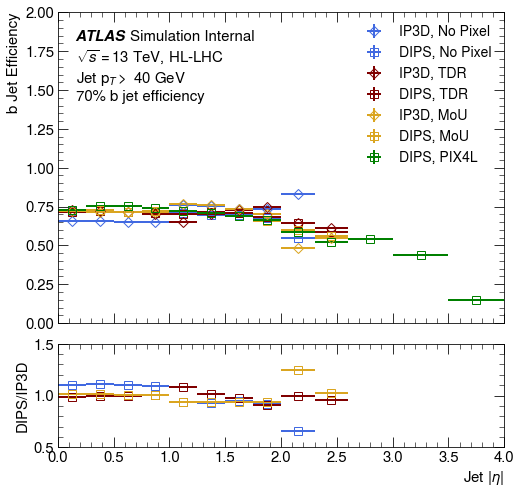

In [18]:
atlas_label = r"$\sqrt{s} = 13$ TeV, HL-LHC"
atlas_label += '\n' + r"Jet p$_T > $ 40 GeV" + '\n'+ '70% b jet efficiency'

v3d = "ip3d_eta_beff_70"
vdi = "dips_eta_beff_70"

uperf.make_eff_comparison("plots/eff_eta.pdf", 
                          [
[histos["npx"][v3d][2], histos["npx"][v3d][0], histos["npx"][v3d][3], histos["npx"][v3d][1], "IP3D, No Pixel", -1, 'royalblue'],
[histos["npx"][vdi][2], histos["npx"][vdi][0], histos["npx"][vdi][3], histos["npx"][vdi][1], "DIPS, No Pixel", 0, 'royalblue'],

[histos["tdr"][v3d][2], histos["tdr"][v3d][0], histos["tdr"][v3d][3], histos["tdr"][v3d][1], "IP3D, TDR", -1, 'maroon'],
[histos["tdr"][vdi][2], histos["tdr"][vdi][0], histos["tdr"][vdi][3], histos["tdr"][vdi][1], "DIPS, TDR", 2, 'maroon'],
                              
[histos["mou"][v3d][2], histos["mou"][v3d][0], histos["mou"][v3d][3], histos["mou"][v3d][1], "IP3D, MoU", -1, 'goldenrod'],
[histos["mou"][vdi][2], histos["mou"][vdi][0], histos["mou"][vdi][3], histos["mou"][vdi][1], "DIPS, MoU", 4, 'goldenrod'],

[histos["px4"][vdi][2], histos["px4"][vdi][0], histos["px4"][vdi][3], histos["px4"][vdi][1], "DIPS, PIX4L", -1, 'green'],

                          ], atlas_label, r"Jet $|\eta|$", "b Jet Efficiency", "DIPS/IP3D",
                          0, 4.0, 
                          0., 2., 
                          0.5, 1.5)

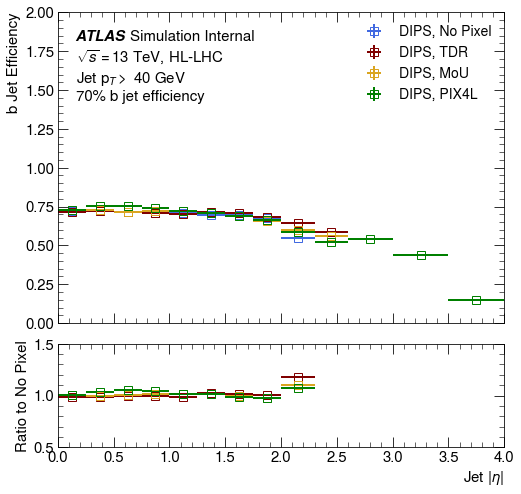

In [19]:
atlas_label = r"$\sqrt{s} = 13$ TeV, HL-LHC"
atlas_label += '\n' + r"Jet p$_T > $ 40 GeV" + '\n'+ '70% b jet efficiency'

v3d = "ip3d_eta_beff_70"
vdi = "dips_eta_beff_70"

uperf.make_eff_comparison("plots/eff_eta_dips_only.pdf", 
                          [
[histos["npx"][vdi][2], histos["npx"][vdi][0], histos["npx"][vdi][3], histos["npx"][vdi][1], "DIPS, No Pixel", -1, 'royalblue'],

[histos["tdr"][vdi][2], histos["tdr"][vdi][0], histos["tdr"][vdi][3], histos["tdr"][vdi][1], "DIPS, TDR", 0, 'maroon'],
                              
[histos["mou"][vdi][2], histos["mou"][vdi][0], histos["mou"][vdi][3], histos["mou"][vdi][1], "DIPS, MoU", 0, 'goldenrod'],

[histos["px4"][vdi][2], histos["px4"][vdi][0], histos["px4"][vdi][3], histos["px4"][vdi][1], "DIPS, PIX4L", 0, 'green'],

                          ], atlas_label, r"Jet $|\eta|$", "b Jet Efficiency", "Ratio to No Pixel",
                          0, 4.0, 
                          0., 2., 
                          0.5, 1.5)

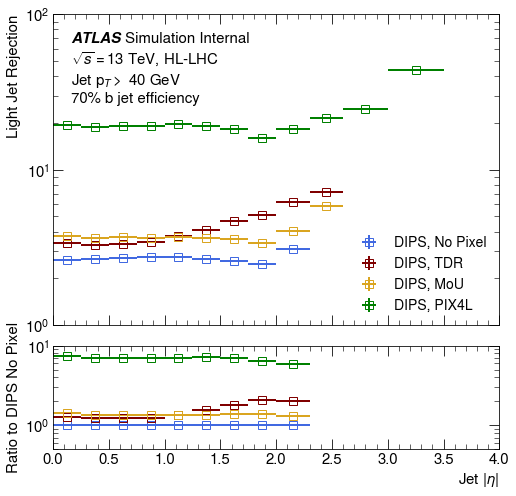

In [25]:
atlas_label = r"$\sqrt{s} = 13$ TeV, HL-LHC"
atlas_label += '\n' + r"Jet p$_T > $ 40 GeV" + '\n'+ '70% b jet efficiency'

v3d = "ip3d_eta_leff_70"
vdi = "dips_eta_leff_70"

uperf.make_eff_comparison("plots/eff_eta_l_ip3d_only.pdf", 
                          [
# [histos["npx"][v3d][2], 1./histos["npx"][v3d][0], histos["npx"][v3d][3], histos["npx"][v3d][1], "IP3D, No Pixel", -1, 'royalblue'],
[histos["npx"][vdi][2], 1./histos["npx"][vdi][0], histos["npx"][vdi][3], histos["npx"][vdi][1], "DIPS, No Pixel", 0, 'royalblue'],

# [histos["tdr"][v3d][2], 1./histos["tdr"][v3d][0], histos["tdr"][v3d][3], histos["tdr"][v3d][1], "IP3D, TDR", 0, 'maroon'],
[histos["tdr"][vdi][2], 1./histos["tdr"][vdi][0], histos["tdr"][vdi][3], histos["tdr"][vdi][1], "DIPS, TDR", 0, 'maroon'],
                              
# [histos["mou"][v3d][2], 1./histos["mou"][v3d][0], histos["mou"][v3d][3], histos["mou"][v3d][1], "IP3D, MoU", 0, 'goldenrod'],
[histos["mou"][vdi][2], 1./histos["mou"][vdi][0], histos["mou"][vdi][3], histos["mou"][vdi][1], "DIPS, MoU", 0, 'goldenrod'],

[histos["px4"][vdi][2], 1./histos["px4"][vdi][0], histos["px4"][vdi][3], histos["px4"][vdi][1], "DIPS, PIX4L", 0, 'green'],

                          ], atlas_label, r"Jet $|\eta|$", "Light Jet Rejection", "Ratio to DIPS No Pixel",
                          0, 4.0, 
                          1, 100, 
                          0.5, 10,
                         True, True, 'lower right')

In [ ]:
atlas_label = r"$\sqrt{s} = 13$ TeV, HL-LHC"
atlas_label += '\n' + r"Jet p$_T > $ 40 GeV" + '\n'+ '70% b jet efficiency'

v3d = "ip3d_eta_leff_70"
vdi = "dips_eta_leff_70"

uperf.make_eff_comparison("plots/eff_eta_l.pdf", 
                          [
[histos["npx"][v3d][2], 1./histos["npx"][v3d][0], histos["npx"][v3d][3], histos["npx"][v3d][1], "IP3D, No Pixel", -1, 'royalblue'],
[histos["npx"][vdi][2], 1./histos["npx"][vdi][0], histos["npx"][vdi][3], histos["npx"][vdi][1], "DIPS, No Pixel", 0, 'royalblue'],

[histos["tdr"][v3d][2], 1./histos["tdr"][v3d][0], histos["tdr"][v3d][3], histos["tdr"][v3d][1], "IP3D, TDR", -1, 'maroon'],
[histos["tdr"][vdi][2], 1./histos["tdr"][vdi][0], histos["tdr"][vdi][3], histos["tdr"][vdi][1], "DIPS, TDR", 2, 'maroon'],
                              
[histos["mou"][v3d][2], 1./histos["mou"][v3d][0], histos["mou"][v3d][3], histos["mou"][v3d][1], "IP3D, MoU", -1, 'goldenrod'],
[histos["mou"][vdi][2], 1./histos["mou"][vdi][0], histos["mou"][vdi][3], histos["mou"][vdi][1], "DIPS, MoU", 4, 'goldenrod'],

[histos["px4"][vdi][2], 1./histos["px4"][vdi][0], histos["px4"][vdi][3], histos["px4"][vdi][1], "DIPS, PIX4L", -1, 'green'],

                          ], atlas_label, r"Jet $|\eta|$", "Light Jet Rejection", "DIPS/IP3D",
                          0, 4.0, 
                          1, 100, 
                          0.5, 3,
                         True, False, 'lower right')

In [ ]:
atlas_label = r"$\sqrt{s} = 13$ TeV, HL-LHC"
atlas_label += '\n' + r"Jet p$_T > $ 40 GeV" + '\n'+ '70% b jet efficiency'

v3d = "ip3d_eta_leff_70"
vdi = "dips_eta_leff_70"

uperf.make_eff_comparison("plots/eff_eta_l_mou.pdf", 
                          [
[histos["mou"][v3d][2], 1./histos["mou"][v3d][0], histos["mou"][v3d][3], histos["mou"][v3d][1], "IP3D, MoU", -1, 'goldenrod'],
[histos["mou"][vdi][2], 1./histos["mou"][vdi][0], histos["mou"][vdi][3], histos["mou"][vdi][1], "DIPS, MoU", -1, 'goldenrod'],

                              
[histos["npx"][v3d][2], 1./histos["npx"][v3d][0], histos["npx"][v3d][3], histos["npx"][v3d][1], "IP3D, No Pixel", 0, 'royalblue'],
[histos["npx"][vdi][2], 1./histos["npx"][vdi][0], histos["npx"][vdi][3], histos["npx"][vdi][1], "DIPS, No Pixel", 1, 'royalblue'],

[histos["tdr"][v3d][2], 1./histos["tdr"][v3d][0], histos["tdr"][v3d][3], histos["tdr"][v3d][1], "IP3D, TDR", 0, 'maroon'],
[histos["tdr"][vdi][2], 1./histos["tdr"][vdi][0], histos["tdr"][vdi][3], histos["tdr"][vdi][1], "DIPS, TDR", 1, 'maroon'],
                              

[histos["px4"][vdi][2], 1./histos["px4"][vdi][0], histos["px4"][vdi][3], histos["px4"][vdi][1], "DIPS, PIX4L", 1, 'green'],

                          ], atlas_label, r"Jet $|\eta|$", "Light Jet Rejection", "Ratio to MoU",
                          0, 4.0, 
                          1, 100, 
                          0.5, 10,
                         True, True, 'lower right')

In [ ]:
atlas_label = r"$\sqrt{s} = 13$ TeV, HL-LHC"
atlas_label += '\n' + r"Jet p$_T > $ 20 GeV" + '\n'+ '70% b jet efficiency'

v3d = "ip3d_eta_leff_70"
vdi = "dips_eta_leff_70"

uperf.make_eff_comparison("plots/eff_eta_l_dips_only.pdf", 
                          [
[histos["npx"][vdi][2], 1./histos["npx"][vdi][0], histos["npx"][vdi][3], histos["npx"][vdi][1], "DIPS, No Pixel", -1, 'royalblue'],

[histos["tdr"][vdi][2], 1./histos["tdr"][vdi][0], histos["tdr"][vdi][3], histos["tdr"][vdi][1], "DIPS, TDR", 0, 'maroon'],
                              
[histos["mou"][vdi][2], 1./histos["mou"][vdi][0], histos["mou"][vdi][3], histos["mou"][vdi][1], "DIPS, MoU", 0, 'goldenrod'],

[histos["px4"][vdi][2], 1./histos["px4"][vdi][0], histos["px4"][vdi][3], histos["px4"][vdi][1], "DIPS, PIX4L", 0, 'green'],

                          ], atlas_label, r"Jet $|\eta|$", "Light Jet Rejection", "Ratio to No Pixel",
                          0, 4.0, 
                          0.5, 100, 
                          0.5, 10,
                         True, True, 'lower right')

In [ ]:
atlas_label = r"$\sqrt{s} = 13$ TeV, HL-LHC"
atlas_label += '\n' + r"Jet p$_T > $ 20 GeV" + '\n'+ '70% b jet efficiency'

v3d = "ip3d_eta_beff_70"
vdi = "dips_eta_beff_70"

uperf.make_eff_comparison("plots/eff_eta.pdf", 
                          [
 [histos["in"][v3d][2], histos["in"][v3d][0],  histos["in"][v3d][3],  histos["in"][v3d][1], "IP3D, MoU+L0L1 (InIn)", -1, 'darkgreen'],
 [histos["in"][vdi][2], histos["in"][vdi][0],  histos["in"][vdi][3],  histos["in"][vdi][1], "DIPS, MoU+L0L1 (InIn)", 0, 'darkgreen'],
[histos["out"][v3d][2], histos["out"][v3d][0], histos["out"][v3d][3], histos["out"][v3d][1], "IP3D, MoU+L0L1 (OutOut)", -1, 'mediumblue'],
[histos["out"][vdi][2], histos["out"][vdi][0], histos["out"][vdi][3], histos["out"][vdi][1], "DIPS, MoU+L0L1 (OutOut)", 2, 'mediumblue'],
[histos["tdr"][v3d][2], histos["tdr"][v3d][0], histos["tdr"][v3d][3], histos["tdr"][v3d][1], "IP3D, TDR (InIn)", -1, 'orangered'],
[histos["tdr"][vdi][2], histos["tdr"][vdi][0], histos["tdr"][vdi][3], histos["tdr"][vdi][1], "DIPS, TDR (InIn)", 4, 'orangered'],
[histos["mou"][v3d][2], histos["mou"][v3d][0], histos["mou"][v3d][3], histos["mou"][v3d][1], "IP3D, MoU", -1, 'goldenrod'],
[histos["mou"][vdi][2], histos["mou"][vdi][0], histos["mou"][vdi][3], histos["mou"][vdi][1], "DIPS, MoU", 6, 'goldenrod'],

                          ], atlas_label, r"Jet $|\eta|$", "b Jet Efficiency", "DIPS/IP3D",
                          0, 4.0, 
                          0., 2., 
                          0, 2)

In [ ]:
atlas_label = r"$\sqrt{s} = 13$ TeV, HL-LHC"
atlas_label += '\n' + r"Jet p$_T > $ 20 GeV" + '\n'+ '70% b jet efficiency'

v3d = "ip3d_eta_leff_70"
vdi = "dips_eta_leff_70"

uperf.make_eff_comparison("plots/eff_eta_l.pdf", 
                          [
 [histos["in"][v3d][2], 1./histos["in"][v3d][0],  histos["in"][v3d][3],  histos["in"][v3d][1], "IP3D, MoU+L0L1 (InIn)", -1, 'darkgreen'],
 [histos["in"][vdi][2], 1./histos["in"][vdi][0],  histos["in"][vdi][3],  histos["in"][vdi][1], "DIPS, MoU+L0L1 (InIn)", 0, 'darkgreen'],
[histos["out"][v3d][2], 1./histos["out"][v3d][0], histos["out"][v3d][3], histos["out"][v3d][1], "IP3D, MoU+L0L1 (OutOut)", -1, 'mediumblue'],
[histos["out"][vdi][2], 1./histos["out"][vdi][0], histos["out"][vdi][3], histos["out"][vdi][1], "DIPS, MoU+L0L1 (OutOut)", 2, 'mediumblue'],
[histos["tdr"][v3d][2], 1./histos["tdr"][v3d][0], histos["tdr"][v3d][3], histos["tdr"][v3d][1], "IP3D, TDR (InIn)", -1, 'orangered'],
[histos["tdr"][vdi][2], 1./histos["tdr"][vdi][0], histos["tdr"][vdi][3], histos["tdr"][vdi][1], "DIPS, TDR (InIn)", 4, 'orangered'],
[histos["mou"][v3d][2], 1./histos["mou"][v3d][0], histos["mou"][v3d][3], histos["mou"][v3d][1], "IP3D, MoU", -1, 'goldenrod'],
[histos["mou"][vdi][2], 1./histos["mou"][vdi][0], histos["mou"][vdi][3], histos["mou"][vdi][1], "DIPS, MoU", 6, 'goldenrod'],

                          ], atlas_label, r"Jet $|\eta|$", "Light Jet Rejection", "DIPS/IP3D",
                          0, 4.0, 
                          1, 60000, 
                          1, 10,
                         True, True)

In [ ]:
atlas_label = r"$\sqrt{s} = 13$ TeV, HL-LHC"
atlas_label += '\n' + r"Jet $|\eta| < 4.0$" + '\n' + '70% b jet efficiency'

v3d = "ip3d_pt_beff_70"
vdi = "dips_pt_beff_70"

uperf.make_eff_comparison("plots/eff_pt.pdf", 
                          [
 [histos["in"][v3d][2], histos["in"][v3d][0],  histos["in"][v3d][3],  histos["in"][v3d][1], "IP3D, MoU+L0L1 (InIn)", -1, 'darkgreen'],
 [histos["in"][vdi][2], histos["in"][vdi][0],  histos["in"][vdi][3],  histos["in"][vdi][1], "DIPS, MoU+L0L1 (InIn)", 0, 'darkgreen'],
[histos["out"][v3d][2], histos["out"][v3d][0], histos["out"][v3d][3], histos["out"][v3d][1], "IP3D, MoU+L0L1 (OutOut)", -1, 'mediumblue'],
[histos["out"][vdi][2], histos["out"][vdi][0], histos["out"][vdi][3], histos["out"][vdi][1], "DIPS, MoU+L0L1 (OutOut)", 2, 'mediumblue'],
[histos["tdr"][v3d][2], histos["tdr"][v3d][0], histos["tdr"][v3d][3], histos["tdr"][v3d][1], "IP3D, TDR (InIn)", -1, 'orangered'],
[histos["tdr"][vdi][2], histos["tdr"][vdi][0], histos["tdr"][vdi][3], histos["tdr"][vdi][1], "DIPS, TDR (InIn)", 4, 'orangered'],
[histos["mou"][v3d][2], histos["mou"][v3d][0], histos["mou"][v3d][3], histos["mou"][v3d][1], "IP3D, MoU", -1, 'goldenrod'],
[histos["mou"][vdi][2], histos["mou"][vdi][0], histos["mou"][vdi][3], histos["mou"][vdi][1], "DIPS, MoU", 6, 'goldenrod'],

                          ], atlas_label, r"Jet p$_{T}$ [GeV]", "b Jet Efficiency", "DIPS/IP3D",
                          20, 200, 
                          0., 2., 
                          0.8, 1.2)

In [ ]:
atlas_label = r"$\sqrt{s} = 13$ TeV, HL-LHC"
atlas_label += '\n' + r"Jet p$_T > $ 20 GeV" + '\n'+ '70% b jet efficiency'

v3d = "ip3d_pt_leff_70"
vdi = "dips_pt_leff_70"

uperf.make_eff_comparison("plots/eff_pt_l.pdf", 
                          [
 [histos["in"][v3d][2], 1./histos["in"][v3d][0],  histos["in"][v3d][3],  histos["in"][v3d][1], "IP3D, MoU+L0L1 (InIn)", -1, 'darkgreen'],
 [histos["in"][vdi][2], 1./histos["in"][vdi][0],  histos["in"][vdi][3],  histos["in"][vdi][1], "DIPS, MoU+L0L1 (InIn)", 0, 'darkgreen'],
[histos["out"][v3d][2], 1./histos["out"][v3d][0], histos["out"][v3d][3], histos["out"][v3d][1], "IP3D, MoU+L0L1 (OutOut)", -1, 'mediumblue'],
[histos["out"][vdi][2], 1./histos["out"][vdi][0], histos["out"][vdi][3], histos["out"][vdi][1], "DIPS, MoU+L0L1 (OutOut)", 2, 'mediumblue'],
[histos["tdr"][v3d][2], 1./histos["tdr"][v3d][0], histos["tdr"][v3d][3], histos["tdr"][v3d][1], "IP3D, TDR (InIn)", -1, 'orangered'],
[histos["tdr"][vdi][2], 1./histos["tdr"][vdi][0], histos["tdr"][vdi][3], histos["tdr"][vdi][1], "DIPS, TDR (InIn)", 4, 'orangered'],
[histos["mou"][v3d][2], 1./histos["mou"][v3d][0], histos["mou"][v3d][3], histos["mou"][v3d][1], "IP3D, MoU", -1, 'goldenrod'],
[histos["mou"][vdi][2], 1./histos["mou"][vdi][0], histos["mou"][vdi][3], histos["mou"][vdi][1], "DIPS, MoU", 6, 'goldenrod'],

                          ], atlas_label, r"Jet p$_{T}$ [GeV]", "Light Jet Rejection", "DIPS/IP3D",
                          20, 200, 
                          1, 60000, 
                          0, 6,
                         True)

In [ ]:
histos = {}

for de in d:
    histos[de] = {}
    
    ##roc inclusive
    pt_cut = (d[de]['pt'] > 40000.) & (d[de]['pt'] < 60000.)
    eta_cut = np.abs(d[de]['eta']) < 4.0
    ind_cut = pt_cut & eta_cut
    
    flav_b = d[de]['flav'] == 5
    flav_l = d[de]['flav'] == 0
    
    ip3d_score_b = d[de]["ip3d"][ind_cut & flav_b]
    dips_score_b = d[de]["dips"][ind_cut & flav_b].flatten()

    ip3d_score_l = d[de]["ip3d"][ind_cut & flav_l]
    dips_score_l = d[de]["dips"][ind_cut & flav_l].flatten()
    
    ip3d_wp_70 = uperf.find_wp( d[de]["ip3d"][(flav_b) & (d[de]['pt']>40000.) & (d[de]['pt']<60000.) ], 0.7, xmin=-30, xmax=30 )
    dips_wp_70 = uperf.find_wp( d[de]["dips"][(flav_b) & (d[de]['pt']>40000.) & (d[de]['pt']<60000.) ], 0.7, xmin=0, xmax=1 )
    print(ip3d_wp_70, dips_wp_70)
    
    ptbins = [20,30,40,50,60,80,100,125,150,175,200,225,250]
    if de == 'mou' or de == 'tdr':
        etabins = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.3, 2.6]
    else:
        etabins = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.3, 2.6, 3.0, 3.5, 4.0]

    histos[de]['ip3d_eta_beff_70'] = uperf.geteff( np.abs(d[de]['eta'][ind_cut & flav_b]), ip3d_score_b, ip3d_wp_70, bins=etabins )
    histos[de]['dips_eta_beff_70'] = uperf.geteff( np.abs(d[de]['eta'][ind_cut & flav_b]), dips_score_b, dips_wp_70, bins=etabins )
    
    histos[de]['ip3d_eta_leff_70'] = uperf.geteff( np.abs(d[de]['eta'][ind_cut & flav_l]), ip3d_score_l, ip3d_wp_70, bins=etabins )
    histos[de]['dips_eta_leff_70'] = uperf.geteff( np.abs(d[de]['eta'][ind_cut & flav_l]), dips_score_l, dips_wp_70, bins=etabins )
    

In [ ]:
atlas_label = r"$\sqrt{s} = 13$ TeV, HL-LHC"
atlas_label += '\n' + r"40 GeV < Jet p$_T < $ 60 GeV" + '\n' + '70% b jet efficiency'

v3d = "ip3d_eta_beff_70"
vdi = "dips_eta_beff_70"

uperf.make_eff_comparison("plots/eff_eta_4060.pdf", 
                          [
 [histos["in"][v3d][2], histos["in"][v3d][0],  histos["in"][v3d][3],  histos["in"][v3d][1], "IP3D, MoU+L0L1 (InIn)", -1, 'darkgreen'],
 [histos["in"][vdi][2], histos["in"][vdi][0],  histos["in"][vdi][3],  histos["in"][vdi][1], "DIPS, MoU+L0L1 (InIn)", 0, 'darkgreen'],
[histos["out"][v3d][2], histos["out"][v3d][0], histos["out"][v3d][3], histos["out"][v3d][1], "IP3D, MoU+L0L1 (OutOut)", -1, 'mediumblue'],
[histos["out"][vdi][2], histos["out"][vdi][0], histos["out"][vdi][3], histos["out"][vdi][1], "DIPS, MoU+L0L1 (OutOut)", 2, 'mediumblue'],
[histos["tdr"][v3d][2], histos["tdr"][v3d][0], histos["tdr"][v3d][3], histos["tdr"][v3d][1], "IP3D, TDR (InIn)", -1, 'orangered'],
[histos["tdr"][vdi][2], histos["tdr"][vdi][0], histos["tdr"][vdi][3], histos["tdr"][vdi][1], "DIPS, TDR (InIn)", 4, 'orangered'],
[histos["mou"][v3d][2], histos["mou"][v3d][0], histos["mou"][v3d][3], histos["mou"][v3d][1], "IP3D, MoU", -1, 'goldenrod'],
[histos["mou"][vdi][2], histos["mou"][vdi][0], histos["mou"][vdi][3], histos["mou"][vdi][1], "DIPS, MoU", 6, 'goldenrod'],

                          ], atlas_label, r"Jet $|\eta|$", "b Jet Efficiency", "DIPS/IP3D",
                          0, 4.0, 
                          0., 2., 
                          0, 2)

In [ ]:
atlas_label = r"$\sqrt{s} = 13$ TeV, HL-LHC"
atlas_label += '\n' + r"40 GeV < Jet p$_T < $ 60 GeV" + '\n'+ '70% b jet efficiency'

v3d = "ip3d_eta_leff_70"
vdi = "dips_eta_leff_70"

uperf.make_eff_comparison("plots/eff_eta_l_4060.pdf", 
                          [
 [histos["in"][v3d][2], 1./histos["in"][v3d][0],  histos["in"][v3d][3],  histos["in"][v3d][1], "IP3D, MoU+L0L1 (InIn)", -1, 'darkgreen'],
 [histos["in"][vdi][2], 1./histos["in"][vdi][0],  histos["in"][vdi][3],  histos["in"][vdi][1], "DIPS, MoU+L0L1 (InIn)", 0, 'darkgreen'],
[histos["out"][v3d][2], 1./histos["out"][v3d][0], histos["out"][v3d][3], histos["out"][v3d][1], "IP3D, MoU+L0L1 (OutOut)", -1, 'mediumblue'],
[histos["out"][vdi][2], 1./histos["out"][vdi][0], histos["out"][vdi][3], histos["out"][vdi][1], "DIPS, MoU+L0L1 (OutOut)", 2, 'mediumblue'],
[histos["tdr"][v3d][2], 1./histos["tdr"][v3d][0], histos["tdr"][v3d][3], histos["tdr"][v3d][1], "IP3D, TDR (InIn)", -1, 'orangered'],
[histos["tdr"][vdi][2], 1./histos["tdr"][vdi][0], histos["tdr"][vdi][3], histos["tdr"][vdi][1], "DIPS, TDR (InIn)", 4, 'orangered'],
[histos["mou"][v3d][2], 1./histos["mou"][v3d][0], histos["mou"][v3d][3], histos["mou"][v3d][1], "IP3D, MoU", -1, 'goldenrod'],
[histos["mou"][vdi][2], 1./histos["mou"][vdi][0], histos["mou"][vdi][3], histos["mou"][vdi][1], "DIPS, MoU", 6, 'goldenrod'],

                          ], atlas_label, r"Jet $|\eta|$", "Light Jet Rejection", "DIPS/IP3D",
                          0, 4.0, 
                          1, 60000, 
                          1, 10,
                         True, True)